<a href="https://colab.research.google.com/github/19521309/CS331.M21-/blob/main/tf_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing modules
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
center1 = (55, 60)
center2 = (80, 20)
distance = 20


x1 = np.random.uniform(center1[0], center1[0] + distance, size=(100,))
y1 = np.random.normal(center1[1], distance, size=(100,)) 

x2 = np.random.uniform(center2[0], center2[0] + distance, size=(100,))
y2 = np.random.normal(center2[1], distance, size=(100,)) 

In [ ]:
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

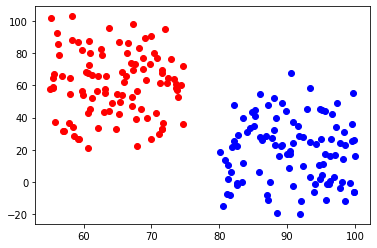

In [ ]:
plt.scatter(x1,y1,color = 'red')
plt.scatter(x2,y2,color = 'blue')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
def sigmoid(z):
    sig =  1 / (1 + np.exp( - z))
    sig = tf.math.minimum(sig,0.99999999999999999999999999999999)
    sig = tf.math.maximum(sig,0.00000000000000000000000000000000)
    return sig


In [ ]:
x = (x1,x2)

y = (y1,y2)

In [ ]:
def init_theta():
	return [1.0, 1.0]
theta = init_theta()

In [ ]:
def LossFrunction(y):
  prediction = sigmoid(tf.matmul(tf.transpose(theta),x))
  return - tf.math.reduce_mean(y*tf.math.log(prediction) + (1-y)*tf.math.log(1-prediction))

In [ ]:
eps = 0.01
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
count_epoch = 1
epoch = 1000

In [ ]:
epsilon=1e-6

In [ ]:
while True:
  with tf.GradientTape() as tape:
    loss = LossFrunction(theta)
  grads = tape.gradient(loss,theta)
  opt.apply_gradients(zip(grads,theta))
  print()
  if tf.experimental.all((tf.math.abs(grads)<epsilon)) or count_epoch == epoch:
    break
  count_epoch += 1

ValueError: ignored